Import Package<br>
目的 : 分析CCTV<br>
讀取frame_num.txt，分析frame數區間(以十個frame為區間)，儲存於frame_interval.txt(training 需使用)
並會將frame數分布圖存在frame.png

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cctvs : 要分析的cctv，可自行調整

In [3]:
cctvs = ['nfbCCTV-N5-N-16.915-M', 'nfbCCTV-N5-N-18.308-M', 'nfbCCTV-N5-N-22.514-M', 'nfbCCTV-N5-N-25.309-M',
         'nfbCCTV-N5-S-18.339-M', 'nfbCCTV-N5-S-19.7-M', 'nfbCCTV-N5-S-21.048-M', 'nfbCCTV-N5-S-23.896-M']
cctvs = ['nfbCCTV-N5-S-21.048-M', 'nfbCCTV-N5-S-23.896-M', 'nfbCCTV-N5-N-25.309-M']

nfbCCTV-N5-S-21.048-M
nfbCCTV-N5-S-23.896-M
nfbCCTV-N5-N-25.309-M


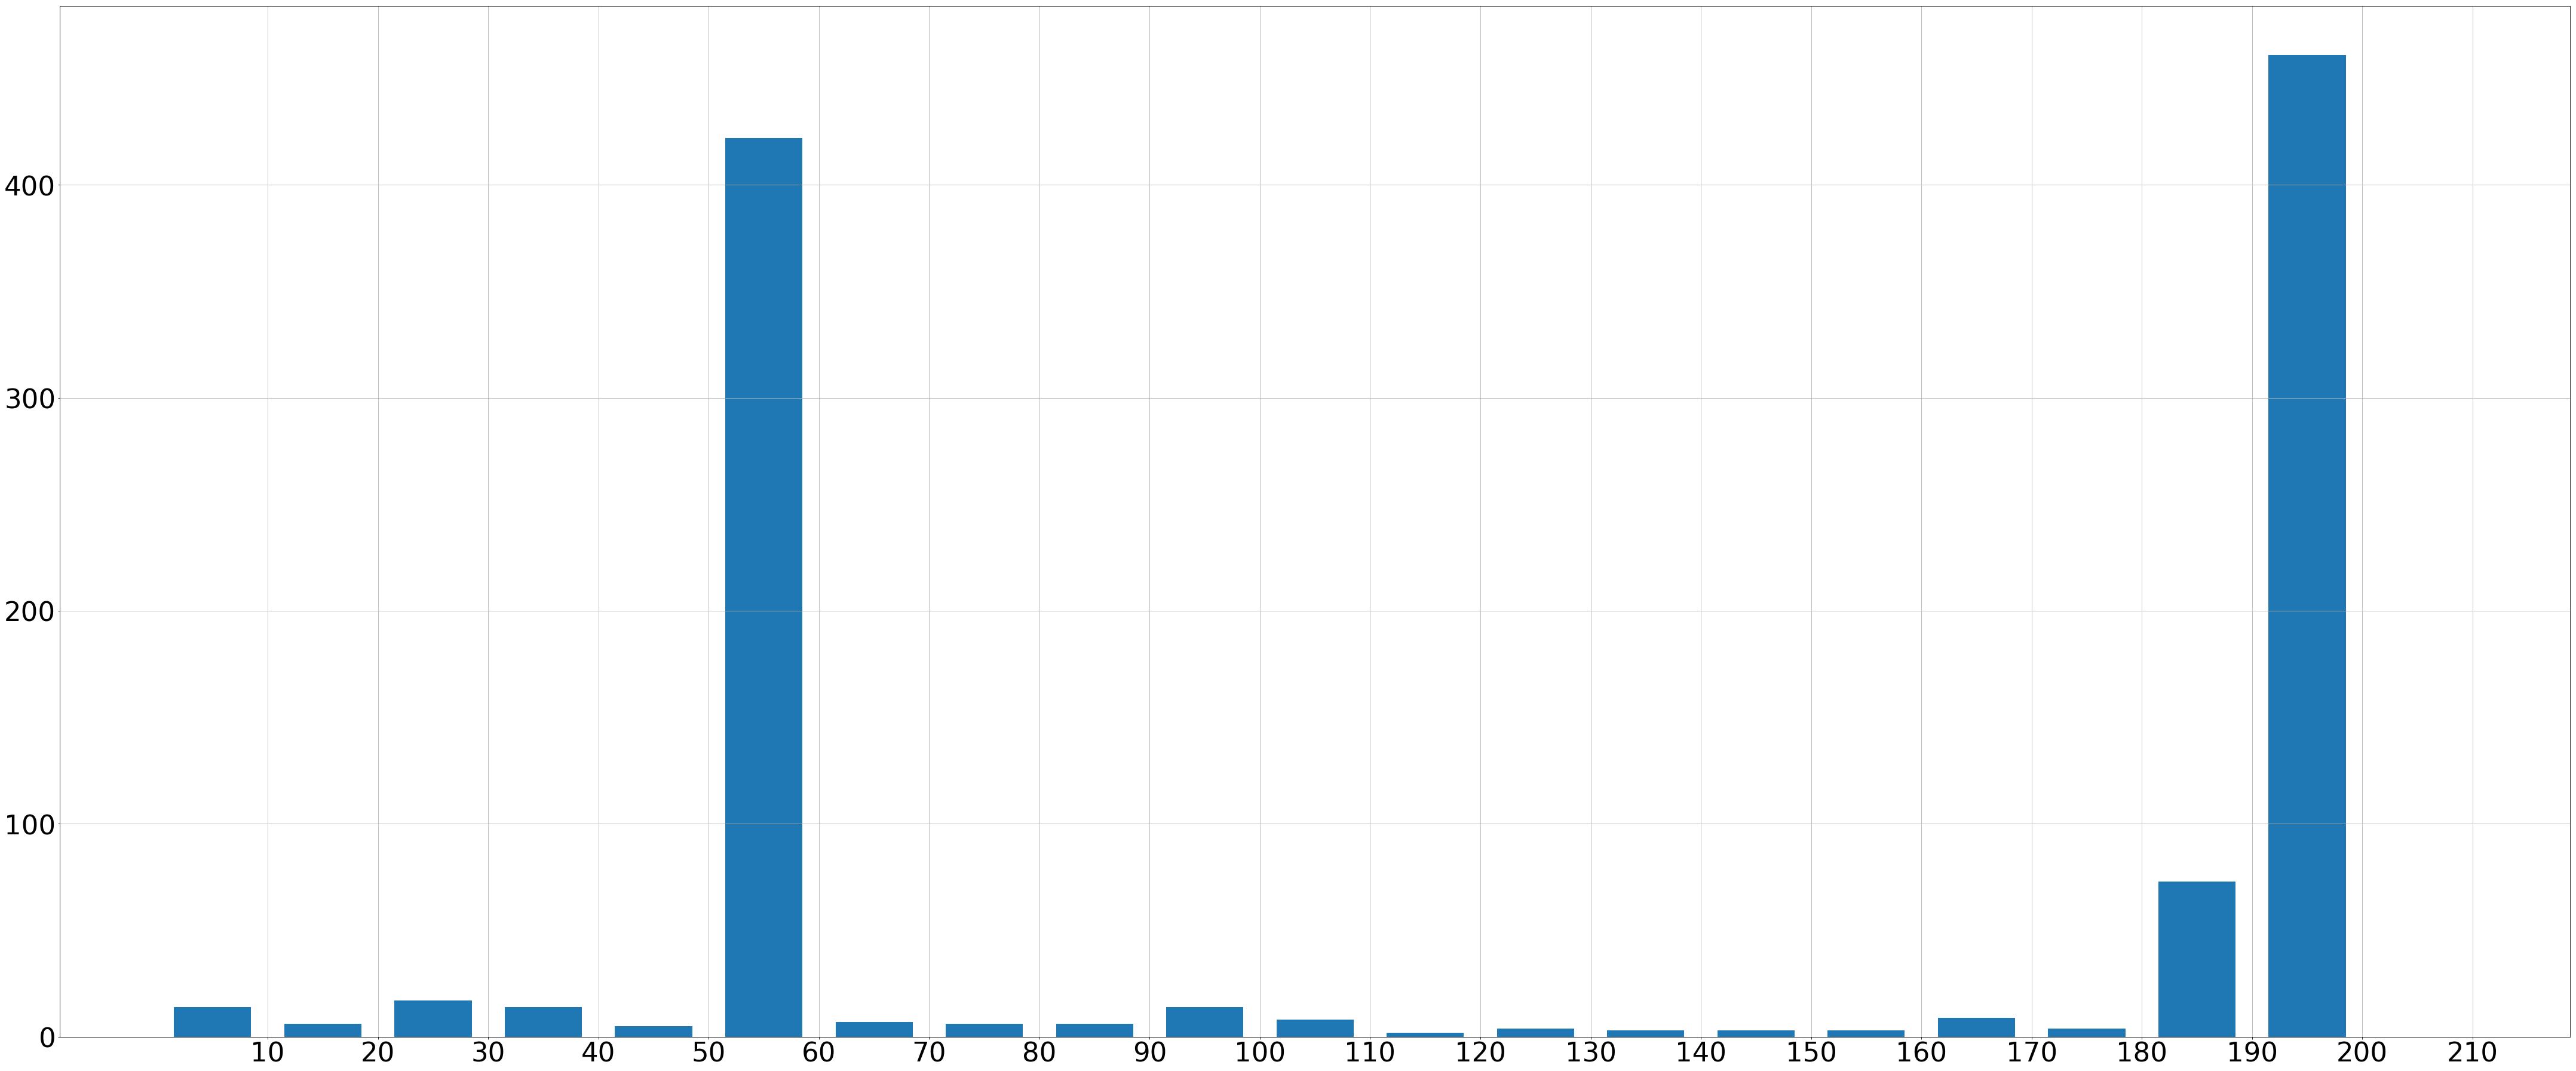

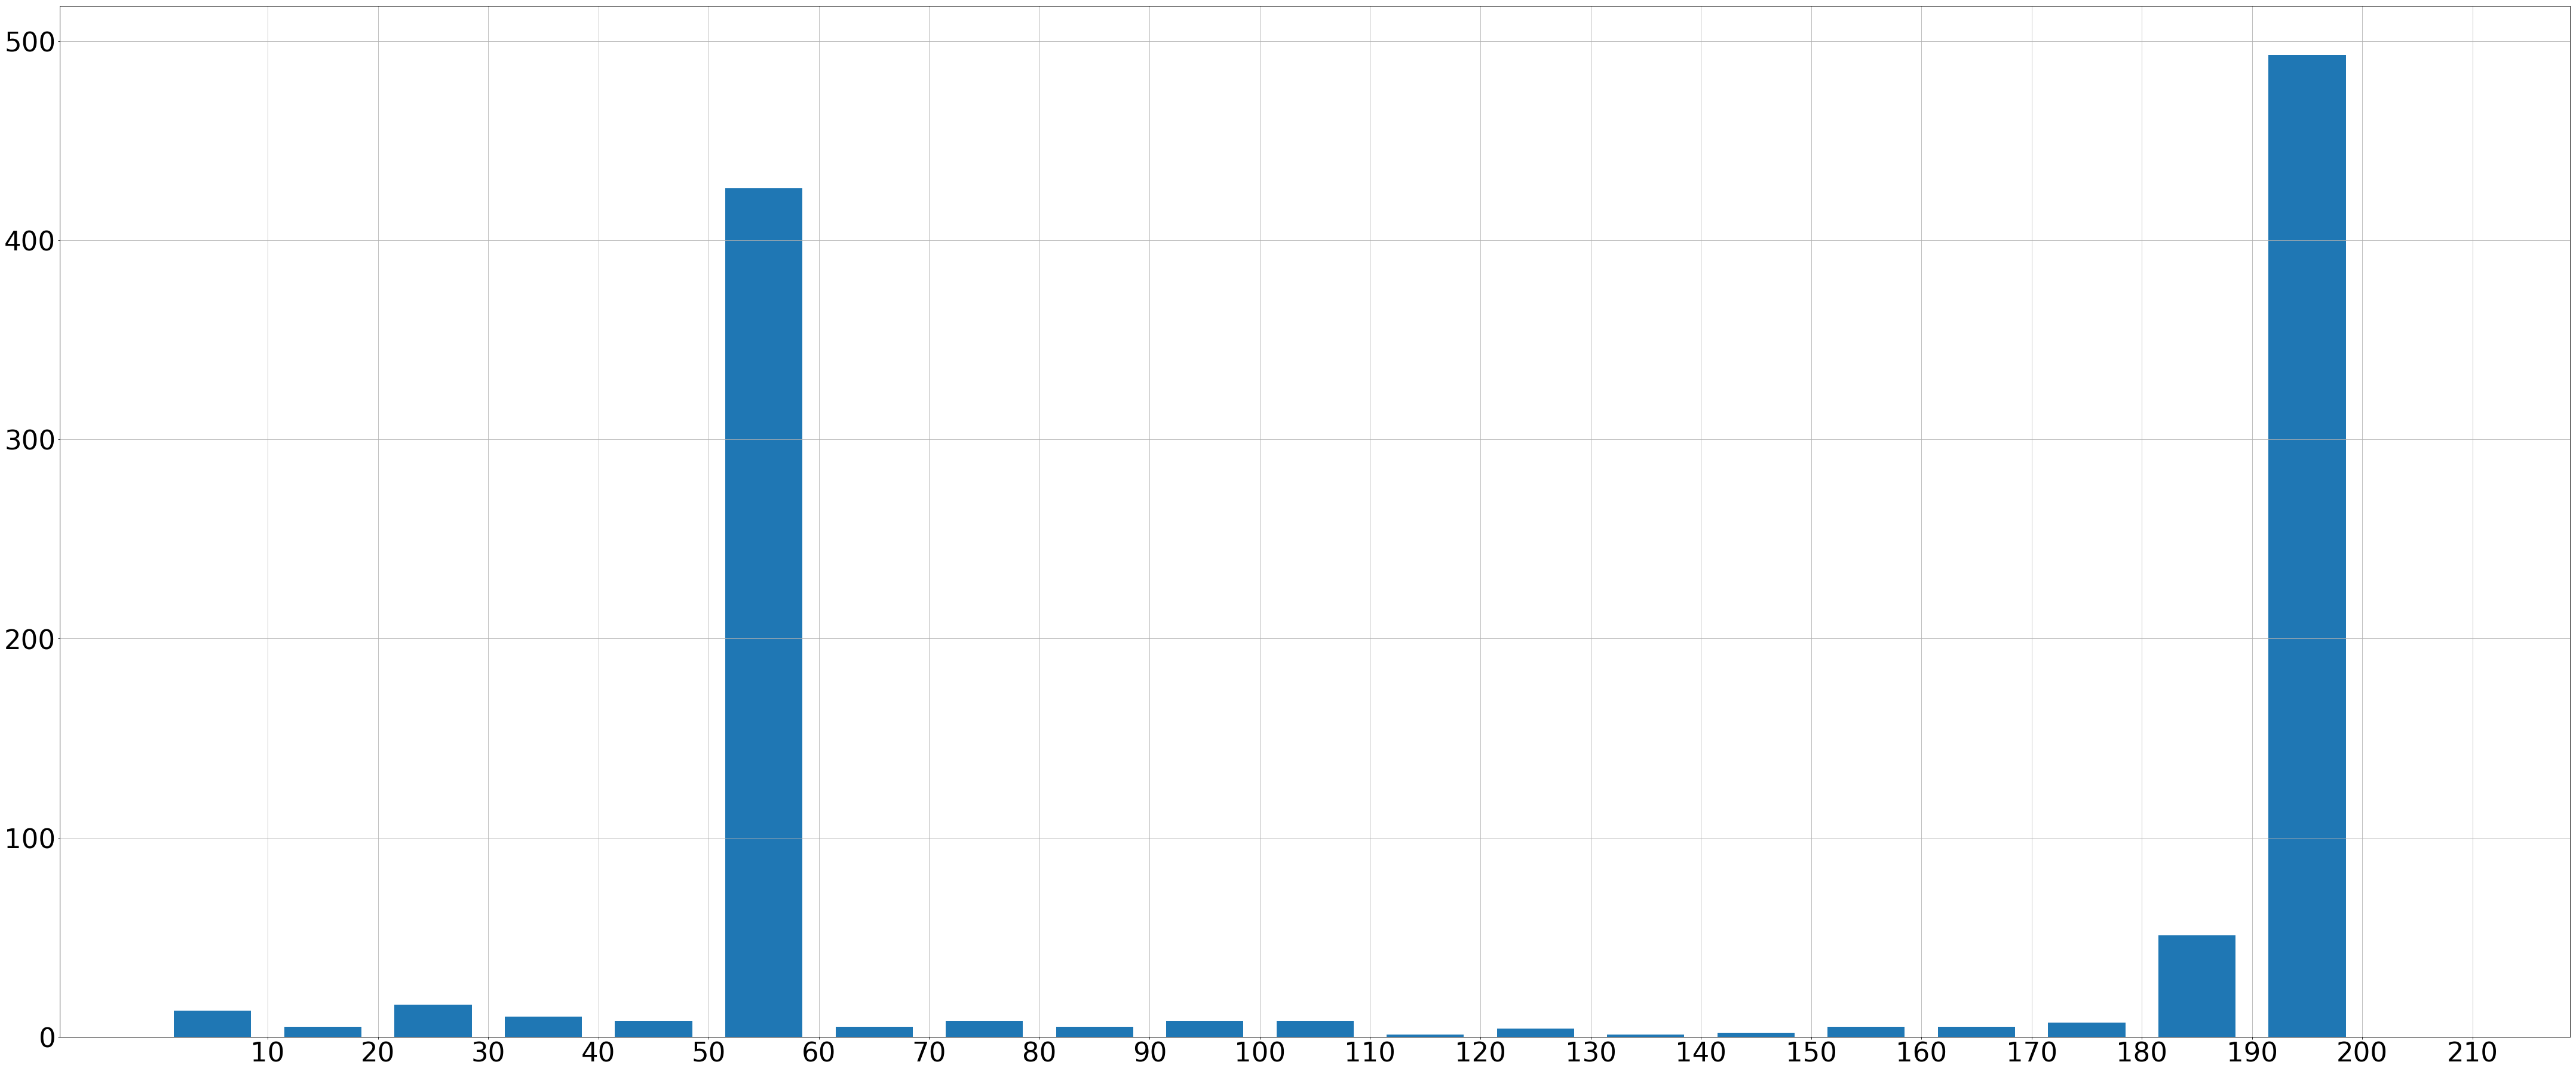

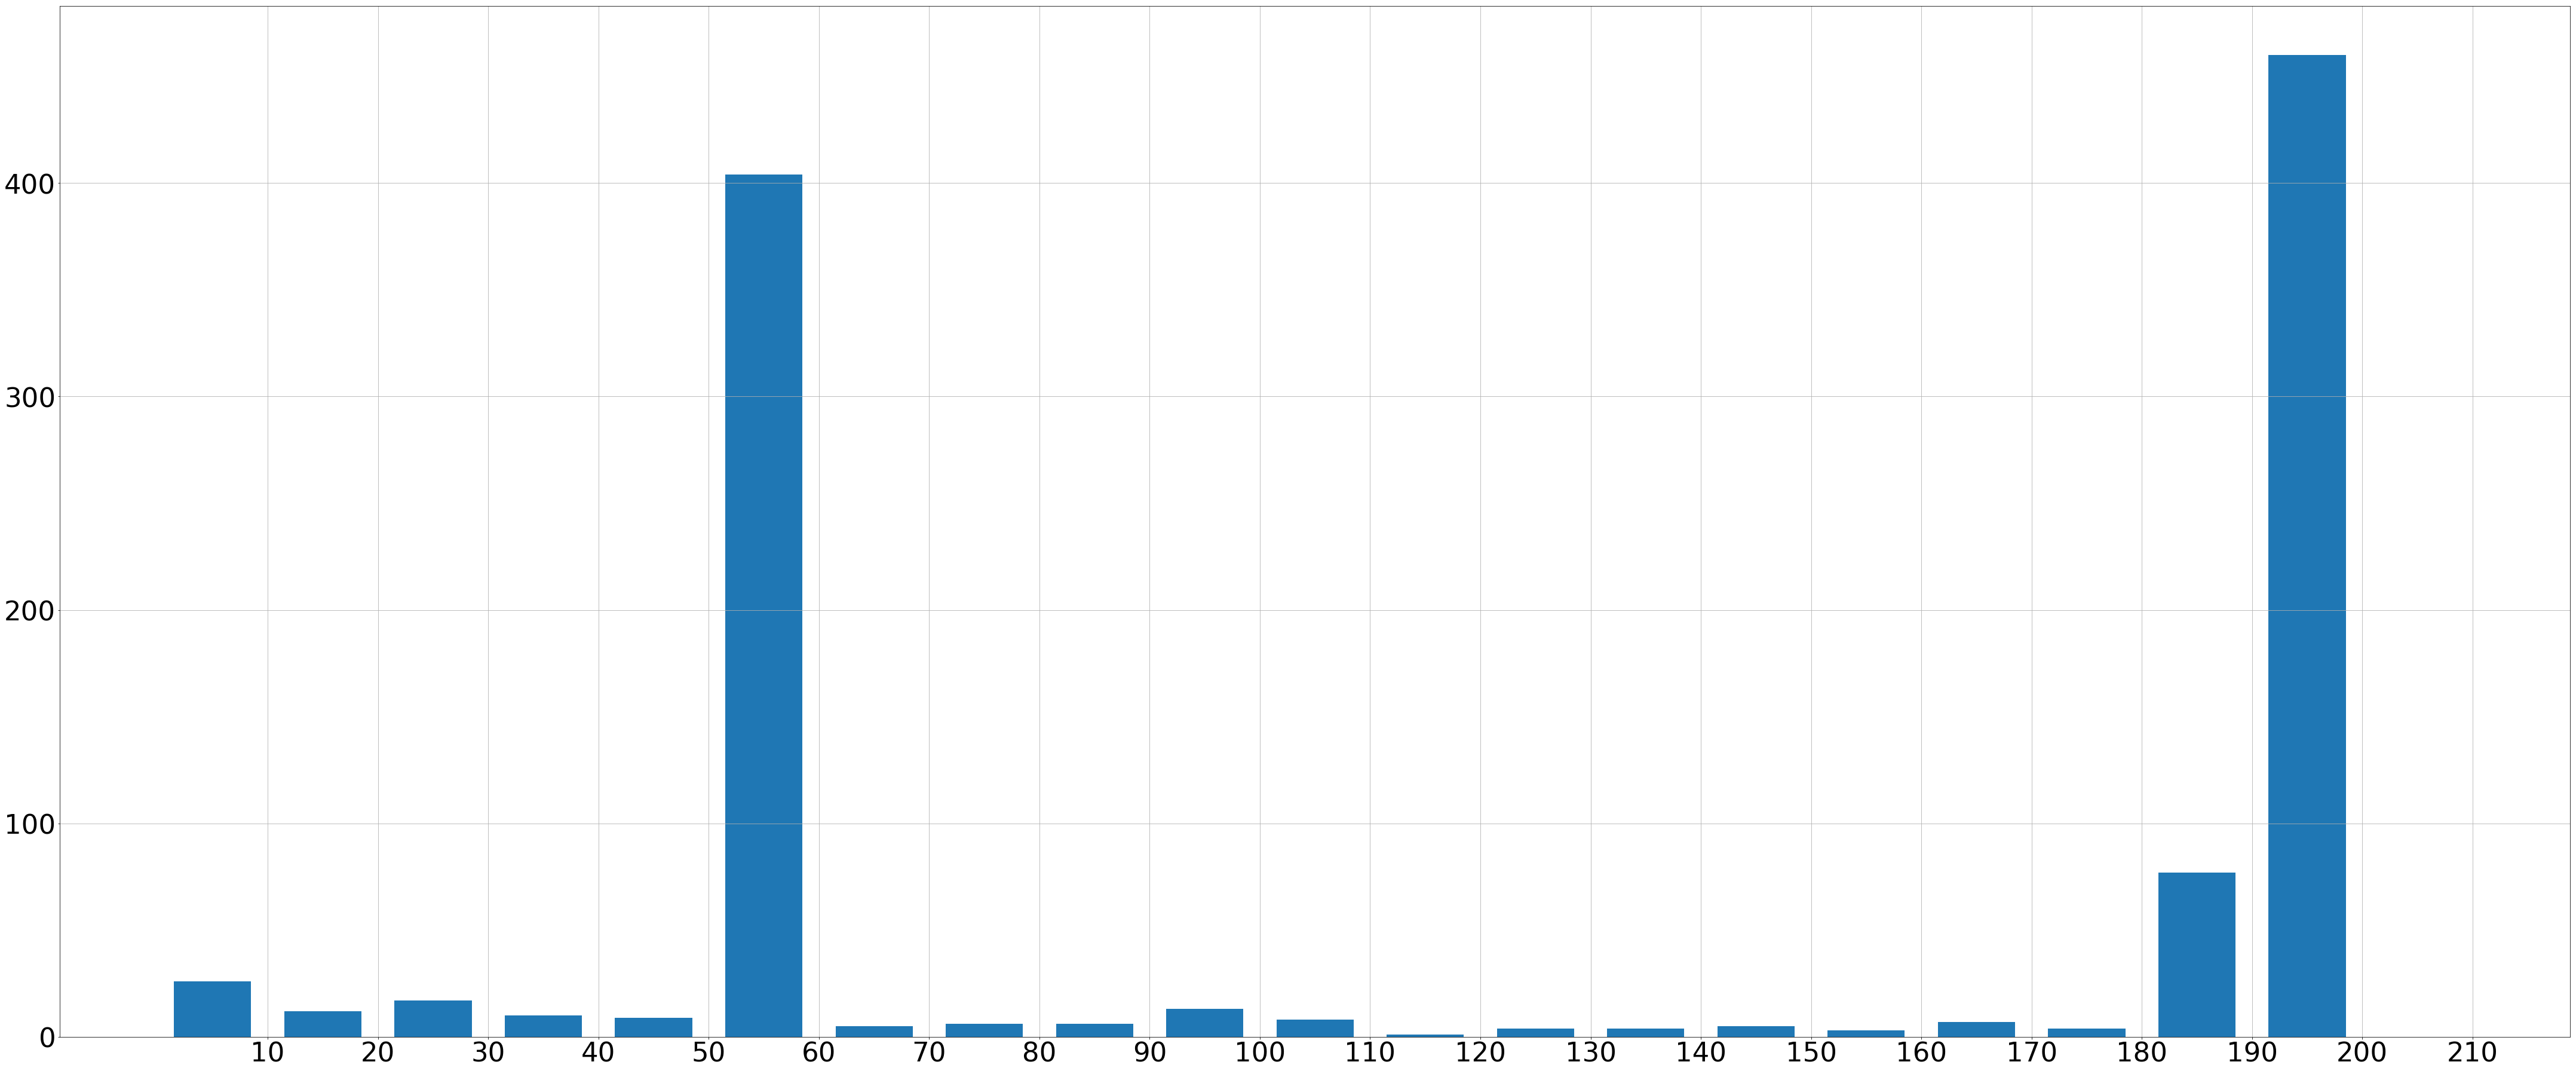

In [7]:
for cctv_Id in cctvs:
    print(cctv_Id)
    count = np.zeros(21)
    cctvDir = 'D:/wcs/cctv/' + cctv_Id + "/frame_num.txt"
    frame_df = pd.read_csv(cctvDir, infer_datetime_format=True, index_col=0, header=None)
    frame_df.index = pd.to_datetime(frame_df.index) #從index 轉成 DatetimeIndex
    for i in frame_df.values:  #counting frame 整除 10後的數量
        count[i//10] += 1
    # for i in range(len(count)):
    #     if count[i] > 1000:
    #         count[i] = 0
    file_name = 'D:/wcs/cctv/' + cctv_Id + "/frame_interval.txt"
    open(file_name, 'w').close()
    for i in count:
        print(int(i), file=open(file_name, 'a'))
    labels = [repr(i) for i in range(10, 211, 10)]
    x = np.arange(len(count)) - 0.5
    plt.figure(num=None, figsize=(60, 25))
    plt.bar(x, count, width=0.7)
    plt.xticks(x + 0.5, labels)
    plt.tight_layout()
    plt.grid()
    plt.tick_params(labelsize=45)
    plt.tight_layout()
    plt.savefig('D:/wcs/cctv/' + cctv_Id + '/frame.png')
    # plt.show()